In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

我們現在要對股價資料做一些處理，方便我們未來做數據處理。

引進這個跟財務有關的套件。

In [2]:
import pandas_datareader.data as web

讀入蘋果公司 2012 到 2017 為期五年的股價。

In [3]:
df = web.DataReader("AAPL", "yahoo", start='2012-9-1', end='2017-8-31')

有最高最低點、開盤收盤價、調整收盤價以及成交量的資訊。

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-08-31,95.514282,93.892860,95.321426,95.034286,84580300.0,82.847824
2012-09-04,96.448570,94.928574,95.108574,96.424286,91973000.0,84.059593
2012-09-05,96.621429,95.657143,96.510002,95.747147,84093800.0,83.469276
2012-09-06,96.898575,95.828575,96.167145,96.610001,97799100.0,84.221489
2012-09-07,97.497147,96.538574,96.864288,97.205711,82416600.0,84.740822


只取調整收盤價。

In [5]:
P = df["Adj Close"]

In [6]:
P.head()

Date
2012-08-31    82.847824
2012-09-04    84.059593
2012-09-05    83.469276
2012-09-06    84.221489
2012-09-07    84.740822
Name: Adj Close, dtype: float64

看一下蘋果股價的波動。

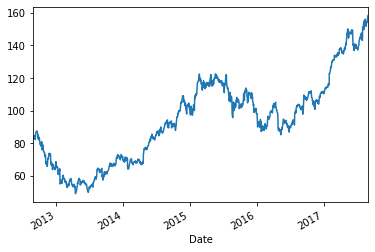

In [7]:
P.plot()

我們看一下大家最關心的報酬率，報酬率公式：$\frac{P_{t}-P_{t-1}}{P_{t-1}}$

In [8]:
r = P.diff()/P

畫出來看看。

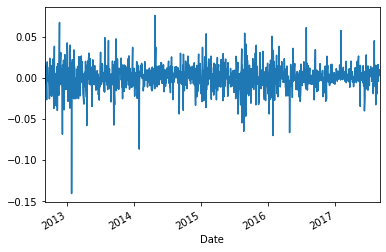

In [9]:
r.plot()

最後一百筆資料。

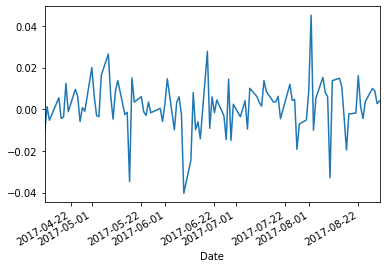

In [10]:
r[-100:].plot()

原本蘋果的股價圖波動的很厲害，現在我們想讓它變得平滑一點，改看每 20 天的平均。

In [11]:
P.rolling(window=20).mean()

Date
2012-08-31           NaN
2012-09-04           NaN
2012-09-05           NaN
2012-09-06           NaN
2012-09-07           NaN
                 ...    
2017-08-25    151.946358
2017-08-28    152.589040
2017-08-29    153.237759
2017-08-30    153.567003
2017-08-31    154.003047
Name: Adj Close, Length: 1258, dtype: float64

可以看到前面幾天沒有值，因為沒辦法往回取得前 19 天的股價。

畫圖發現真的平滑很多。

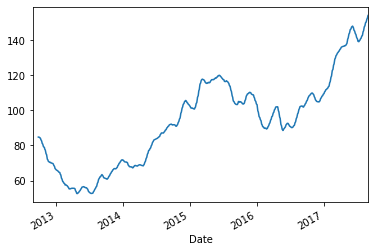

In [12]:
P.rolling(window=20).mean().plot()

和原本的股價圖比較。

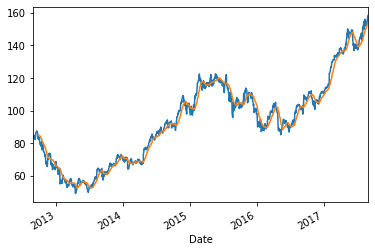

In [13]:
P.plot()
P.rolling(window=20).mean().plot()

當然也可以算更多天的平均，會變得更平滑。

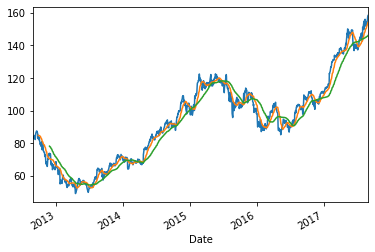

In [14]:
P.plot()
P.rolling(window=20).mean().plot()
P.rolling(window=60).mean().plot()